# ***Proyecto EDA: Airbnb*** 
## ***Visualización***
**Autor:** Óscar Fernández-Chinchilla López

![Logo Airbnb](../images/airbnb-logo.png)


En este notebook se realizan visualizaciones básicas y algunas más avanzadas 
a partir del dataset **limpio** `airbnb_clean.csv`.

El objetivo es:
- Entender la distribución de variables numéricas clave.
- Analizar la frecuencia de categorías importantes.
- Explorar relaciones entre variables (precio, tipo de alojamiento, ubicación...).
- Detectar patrones básicos temporales y de correlación.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(".."))
# Cargamos el dataset limpio
df_airbnb = pd.read_csv("../data/airbnb_clean.csv")

df_airbnb.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,confirmed,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,30,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,74.0,30,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,confirmed,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
4,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,confirmed,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,...,577.0,115.0,3,74.0,2019-06-22,0.59,3.0,1.0,NaN,"No smoking, please, and no drugs."


## 1.1 Comprobación rápida del dataset

In [20]:
# Vistazo rápido a las columnas y tipos de datos
print(df_airbnb.shape)
df_airbnb.dtypes

(84984, 23)


id                                  int64
name                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room_type                          object
construction_year                 float64
price                             float64
service_fee                       float64
minimum_nights                      int64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  float64
house_rules                        object
dtype: object

In [21]:
# Comprobamos que todos los nombres de las columnas están bien
df_airbnb.columns.tolist()

['id',
 'name',
 'host_id',
 'host_identity_verified',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'lat',
 'long',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'price',
 'service_fee',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365',
 'house_rules']

## Al exportar el dataframe a .csv en el jupyter de limpieza, este no guearda tipos de datos complejos como datetime, category, etc, por lo que hay que volver a hacer la conversión de tipos de las columnas del dataframe para poder empezar a analizar las variables.

In [22]:
# Importamos todas las funciones que ya tenemos de limpieza y conversión
from src.cleaning import (
    clean_monetary_columns,
    clean_categorical_values,
    normalize_column_names,
    format_dates,
    convert_numeric_types
)

In [23]:
# Hacemos dos listas con las columnas monetarias y las de Enteros
monetary_cols = ["price", "service_fee"]
int_cols = ["construction_year", "minimum_nights", "number_of_reviews",
            "calculated_host_listings_count", "availability_365"]

# Utilizamos las funciones
df_airbnb = clean_monetary_columns(df_airbnb, monetary_cols)
df_airbnb = clean_categorical_values(df_airbnb)
df_airbnb = normalize_column_names(df_airbnb)
df_airbnb = format_dates(df_airbnb)
df_airbnb = convert_numeric_types(df_airbnb, int_cols=int_cols)

In [24]:
# Sacamos los tipos de las columnas para comprobar que ya todo está correcto
df_airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_identity_verified                  category
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
lat                                      float64
long                                     float64
instant_bookable                         boolean
cancellation_policy                     category
room_type                               category
construction_year                          Int64
price                                    float64
service_fee                              float64
minimum_nights                             Int64
number_of_reviews                          Int64
last_review                       datetime64[ns]
reviews_per_month                        float64
review_rate_number                       float64
calculated_host_list

In [25]:
df_airbnb.describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,8.498400e+04,8.498400e+04,84977.000000,84977.000000,84810.0,84764.000000,84744.000000,84984.0,84926.0,84984,84984.000000,84672.000000,84724.0,82264.0
mean,2.950917e+07,4.919894e+10,40.727483,-73.948943,2012.485273,626.096739,125.181039,7.305116,31.3037,2019-06-08 11:37:24.789607424,1.290561,3.277046,7.073781,135.298344
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.0,50.000000,10.000000,1.0,1.0,2012-07-11 00:00:00,0.010000,1.000000,1.0,0.0
25%,1.524709e+07,2.445972e+10,40.687760,-73.982150,2007.0,341.000000,68.000000,2.0,3.0,2018-10-22 00:00:00,0.220000,2.000000,1.0,5.0
50%,3.084514e+07,4.906405e+10,40.721380,-73.953850,2012.0,625.500000,125.000000,3.0,11.0,2019-06-12 00:00:00,0.730000,3.000000,1.0,93.0
75%,4.333044e+07,7.387121e+10,40.762680,-73.931370,2017.0,913.000000,183.000000,5.0,38.0,2019-07-05 00:00:00,1.990000,4.000000,2.0,253.0
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.0,1200.000000,240.000000,365.0,648.0,2024-08-15 00:00:00,7.060000,5.000000,332.0,365.0
std,1.630541e+07,2.853310e+10,0.056361,0.049781,5.764712,331.504872,66.296144,15.408725,48.833267,NaN,1.412094,1.284302,29.579281,128.39464


# Analisis y visualizaciones

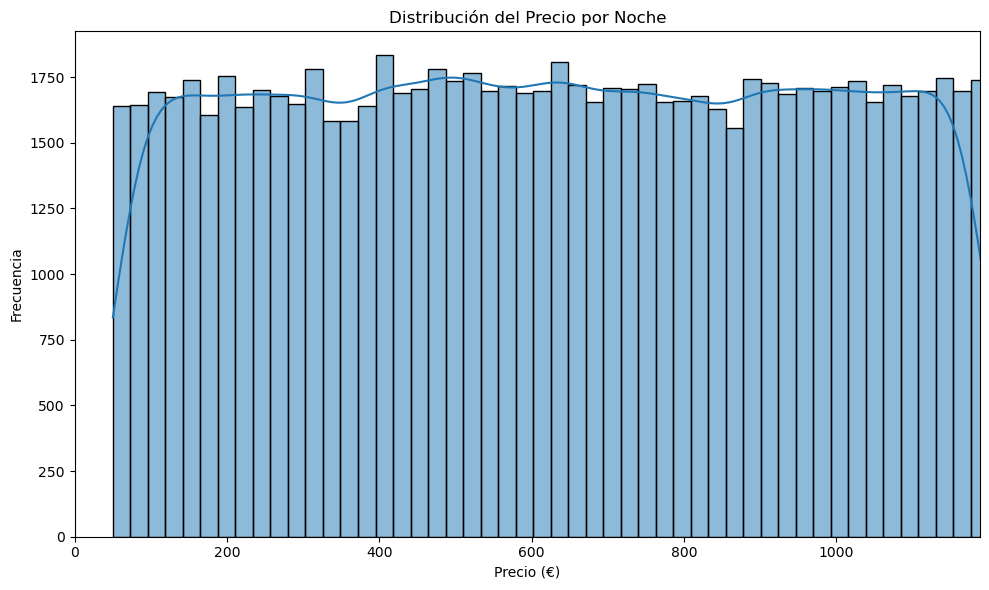

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb["price"], bins=50, kde=True)
plt.title("Distribución del Precio por Noche")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")

# Recortamos el eje X al percentil 99 para evitar que outliers distorsionen la visualización
plt.xlim(0, df_airbnb["price"].quantile(0.99))

plt.tight_layout()
plt.show()

La distribución del precio muestra un comportamiento atípico para un mercado real, ya que las frecuencias son muy uniformes a lo largo de todo el rango de valores.

Esto indica que:
- Los precios podrían haber sido transformados o anonimizados en la publicación pública del dataset.
- El uso comercial real (más oferta barata y menos alojamientos premium) no se refleja fielmente.

Por tanto, cualquier conclusión sobre precios debe ser interpretada con cautela.

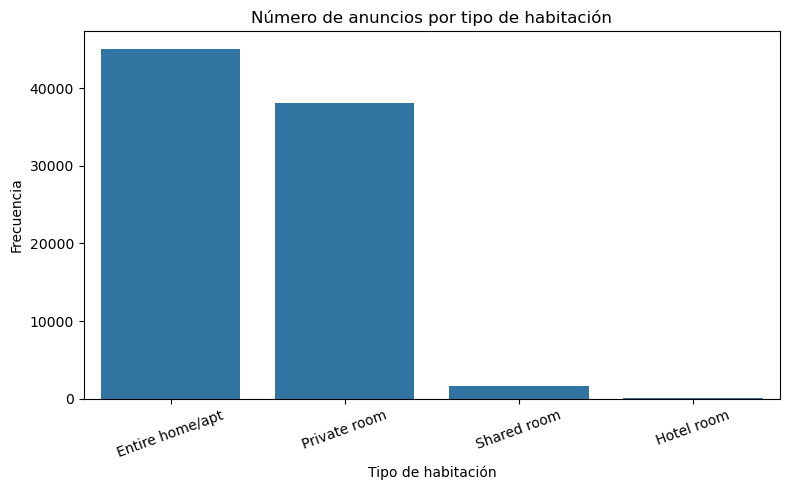

In [30]:
plt.figure(figsize=(8, 5))
order = df_airbnb["room_type"].value_counts().index
sns.countplot(data=df_airbnb, x="room_type", order=order)
plt.title("Número de anuncios por tipo de habitación")
plt.xlabel("Tipo de habitación")
plt.ylabel("Frecuencia")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Conclusiones del análisis por tipo de habitación

- El tipo de alojamiento más frecuente es **Entire home/apt**, con aproximadamente 44000 anuncios.
  Esto indica que la plataforma se utiliza ampliamente para alquiler de viviendas completas, lo cual es característico de estancias vacacionales o grupos.

- Los **Private room** representan el segundo mayor volumen de oferta, orientado a viajeros individuales o de bajo presupuesto.

- Los **Shared room** son una minoría dentro del catálogo, con muy poca popularidad, mientras que **Hotel room** es casi inexistente, lo que refleja que Airbnb se centra más en la economía colaborativa que en el sector hotelero tradicional.

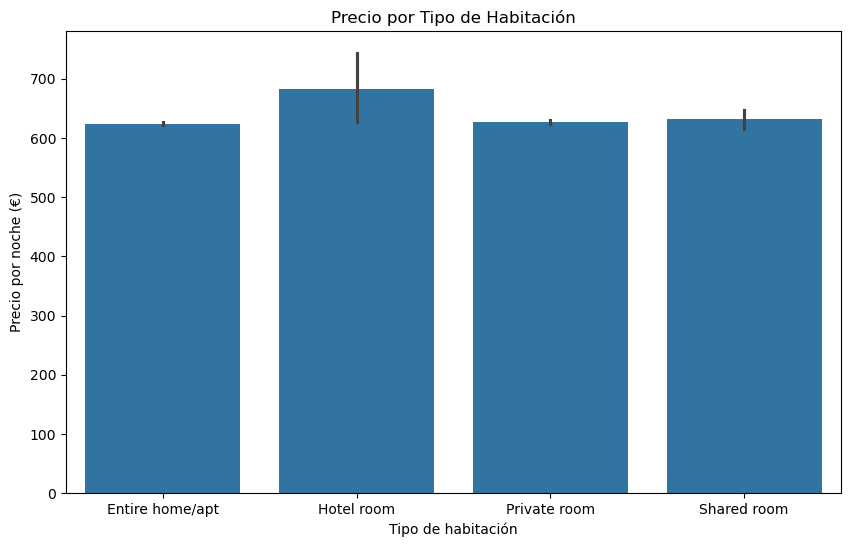

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_airbnb, x="room_type", y="price")
plt.title("Precio por Tipo de Habitación")
plt.xlabel("Tipo de habitación")
plt.ylabel("Precio por noche (€)")
plt.show()

## Conclusiones: Precio según tipo de habitación

Los precios muestran diferencias entre categorías, siendo los `Hotel room`
los más caros, seguidos de `Entire home/apt`, mientras que los tipos
`Private room` y `Shared room` resultan más económicos.

Esta relación es coherente con el modelo de negocio de Airbnb, donde la
privacidad y el espacio disponible son factores que incrementan el precio.

Sin embargo, las medias entre categorías presentan valores muy similares
(entre 620€ y 700€), lo cual sugiere que los precios del dataset están
normalizados o no reflejan con fidelidad el mercado real.

Por tanto, las conclusiones sobre precios deben interpretarse con cautela.

C:\Users\User\AppData\Local\Temp\ipykernel_27008\584320829.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order = df_airbnb.groupby("neighbourhood_group")["price"].median().sort_values().index


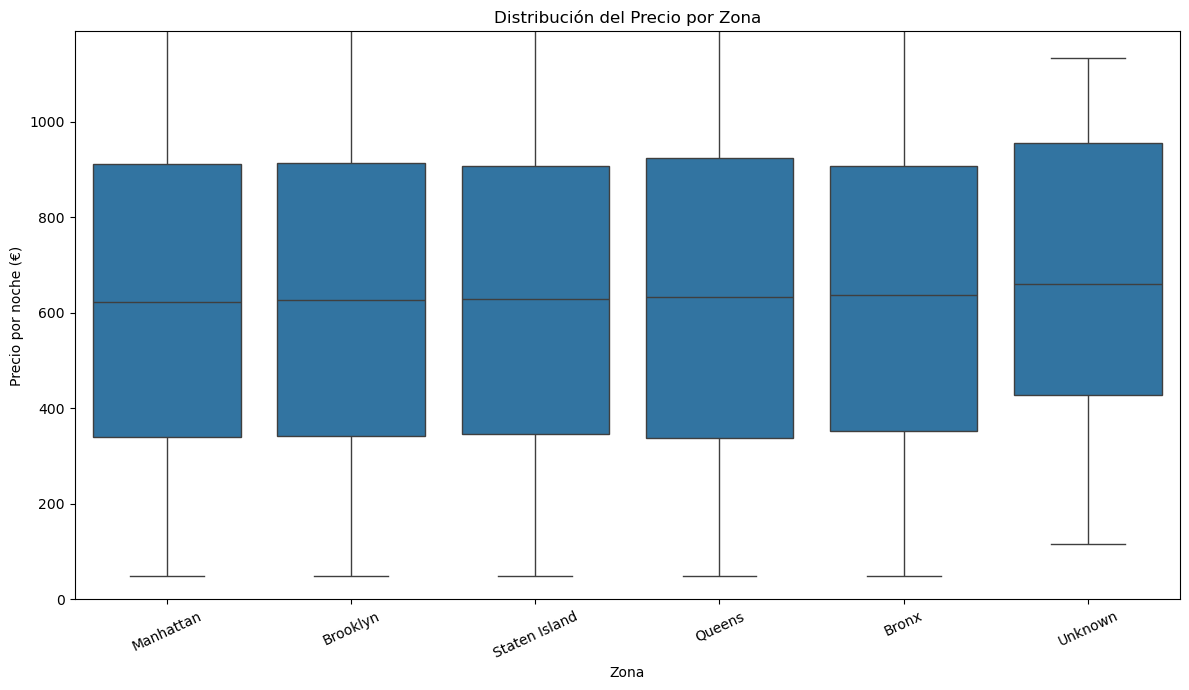

In [43]:
plt.figure(figsize=(12, 7))
order = df_airbnb.groupby("neighbourhood_group")["price"].median().sort_values().index
sns.boxplot(data=df_airbnb, x="neighbourhood_group", y="price", order=order)
plt.title("Distribución del Precio por Zona")
plt.xlabel("Zona")
plt.ylabel("Precio por noche (€)")
plt.ylim(0, df_airbnb["price"].quantile(0.99))
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

## Conclusiones: Precio por zona

El precio muestra variaciones entre zonas geográficas, lo cual es coherente con
el modelo turístico de Nueva York: la ubicación es un factor relevante en el precio.

Sin embargo, las distribuciones presentan rangos y medianas muy parecidas entre
todas las zonas (≈600–700 €), incluyendo barrios que en el mercado real presentan
diferencias de precio muy significativas, como Manhattan frente al Bronx.

Esto sugiere que los precios del dataset han sido normalizados o transformados,
por lo que las conclusiones derivadas de esta variable deben interpretarse con cautela.

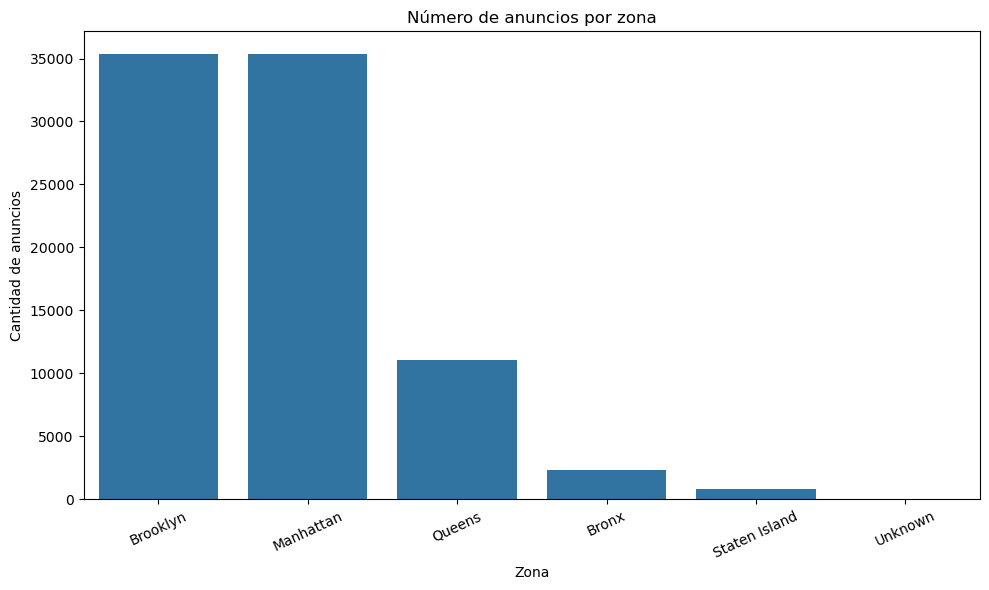

In [47]:
plt.figure(figsize=(10, 6))
order = df_airbnb["neighbourhood_group"].value_counts().index
sns.countplot(data=df_airbnb, x="neighbourhood_group", order=order)
plt.title("Número de anuncios por zona")
plt.xlabel("Zona")
plt.ylabel("Cantidad de anuncios")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()